In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import time
from PIL import Image
import glob
from keras.layers import Conv2D,Dense,Input,Flatten
from keras.models import Model,Sequential
from six.moves import urllib
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
df=pd.read_json('C:/Users/kushal asn/Downloads/a.json',lines=True)
                
print(df.head(5))

Using TensorFlow backend.


                                          annotation  \
0  [{'label': ['number_plate'], 'notes': '', 'poi...   
1  [{'label': ['number_plate'], 'notes': '', 'poi...   
2  [{'label': ['number_plate'], 'notes': '', 'poi...   
3  [{'label': ['number_plate'], 'notes': '', 'poi...   
4  [{'label': ['number_plate'], 'notes': '', 'poi...   

                                             content  extras  
0  http://com.dataturks.a96-i23.open.s3.amazonaws...     NaN  
1  http://com.dataturks.a96-i23.open.s3.amazonaws...     NaN  
2  http://com.dataturks.a96-i23.open.s3.amazonaws...     NaN  
3  http://com.dataturks.a96-i23.open.s3.amazonaws...     NaN  
4  http://com.dataturks.a96-i23.open.s3.amazonaws...     NaN  


In [7]:
counter = 0
dataset = dict()
dataset["image_name"] = list()
dataset["image_width"] = list()
dataset["image_height"] = list()
dataset["top_x"] = list()
dataset["top_y"] = list()
dataset["bottom_x"] = list()
dataset["bottom_y"] = list()
for index, row in df.iterrows():
    img = urllib.request.urlopen(row["content"])
    img = Image.open(img)
    img = img.convert('RGB')
    img.save("C:/Users/kushal asn/Desktop/Indian Number Plates/licensed_car{}.jpeg".format(counter), "JPEG")
    
    dataset["image_name"].append("licensed_car{}".format(counter))
    
    data = row["annotation"]
    
    dataset["image_width"].append(data[0]["imageWidth"])
    dataset["image_height"].append(data[0]["imageHeight"])
    dataset["top_x"].append(data[0]["points"][0]["x"])
    dataset["top_y"].append(data[0]["points"][0]["y"])
    dataset["bottom_x"].append(data[0]["points"][1]["x"])
    dataset["bottom_y"].append(data[0]["points"][1]["y"])
    
    counter += 1
print("Downloaded {} car images.".format(counter))

Downloaded 237 car images.


In [8]:
df=pd.DataFrame(dataset)
df

,image_name,image_width,image_height,top_x,top_y,bottom_x,bottom_y
0,licensed_car0,806,466,0.722084,0.587983,0.868486,0.688841
1,licensed_car1,494,449,0.161943,0.850780,0.582996,1.000000
2,licensed_car2,500,314,0.082000,0.697452,0.230000,0.828025
3,licensed_car3,500,469,0.434000,0.667377,0.718000,0.765458
4,licensed_car4,1001,563,0.208791,0.390764,0.865135,0.984014
5,licensed_car5,416,431,0.254808,0.649652,0.627404,0.777262
6,licensed_car6,551,455,0.411978,0.529670,0.805808,0.692308
7,licensed_car7,550,537,0.485455,0.461825,0.720000,0.595903
8,licensed_car8,1569,1119,0.410758,0.453714,0.568867,0.516571
9,licensed_car9,1632,918,0.413203,0.397101,0.586797,0.623188


In [9]:
df.to_csv("indian_license_plates.csv", index=False)

In [10]:
df = pd.read_csv("indian_license_plates.csv")
df["image_name"] = df["image_name"] + ".jpeg"
df.drop(["image_width", "image_height"], axis=1, inplace=True)
df

,image_name,top_x,top_y,bottom_x,bottom_y
0,licensed_car0.jpeg,0.722084,0.587983,0.868486,0.688841
1,licensed_car1.jpeg,0.161943,0.850780,0.582996,1.000000
2,licensed_car2.jpeg,0.082000,0.697452,0.230000,0.828025
3,licensed_car3.jpeg,0.434000,0.667377,0.718000,0.765458
4,licensed_car4.jpeg,0.208791,0.390764,0.865135,0.984014
5,licensed_car5.jpeg,0.254808,0.649652,0.627404,0.777262
6,licensed_car6.jpeg,0.411978,0.529670,0.805808,0.692308
7,licensed_car7.jpeg,0.485455,0.461825,0.720000,0.595903
8,licensed_car8.jpeg,0.410758,0.453714,0.568867,0.516571
9,licensed_car9.jpeg,0.413203,0.397101,0.586797,0.623188


In [11]:
lucky_test_samples = np.random.randint(0, len(df), 5)
reduced_df = df.drop(lucky_test_samples, axis=0)

In [12]:
WIDTH = 224
HEIGHT = 224
CHANNEL = 3
ddepth=cv2.CV_16S

def show_img(index):
    image = cv2.imread("Indian Number Plates/" + df["image_name"].iloc[index])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.Laplacian(image, ddepth, ksize=3)
    image = cv2.resize(image, dsize=(WIDTH, HEIGHT))

    tx = int(df["top_x"].iloc[index] * WIDTH)
    ty = int(df["top_y"].iloc[index] * HEIGHT)
    bx = int(df["bottom_x"].iloc[index] * WIDTH)
    by = int(df["bottom_y"].iloc[index] * HEIGHT)

    image = cv2.rectangle(image, (tx, ty), (bx, by), (0, 0, 255), 1)
    plt.imshow(image)
    plt.show()

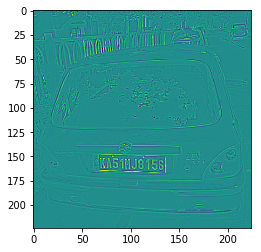

In [13]:
show_img(5)

In [14]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1)

train_generator = datagen.flow_from_dataframe(
    reduced_df,
    directory="Indian Number Plates/",
    x_col="image_name",
    y_col=["top_x", "top_y", "bottom_x", "bottom_y"],
    target_size=(WIDTH, HEIGHT),
    batch_size=32, 
    class_mode="other",
    subset="training")

validation_generator = datagen.flow_from_dataframe(
    reduced_df,
    directory="Indian Number Plates/",
    x_col="image_name",
    y_col=["top_x", "top_y", "bottom_x", "bottom_y"],
    target_size=(WIDTH, HEIGHT),
    batch_size=32, 
    class_mode="other",
    subset="validation")

Found 131 validated image filenames.
Found 14 validated image filenames.


C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\dataframe_iterator.py:273: UserWarning: Found 87 invalid image filename(s) in x_col="image_name". These filename(s) will be ignored.
  .format(n_invalid, x_col)


In [15]:
model=Sequential()
model.build(input_shape=(HEIGHT, WIDTH, CHANNEL))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation="sigmoid"))



model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (224, 672)                0         
_________________________________________________________________
dense_1 (Dense)              (224, 128)                86144     
_________________________________________________________________
dense_2 (Dense)              (224, 10)                 1290      
Total params: 87,434
Trainable params: 87,434
Non-trainable params: 0
_________________________________________________________________


In [16]:
STEP_SIZE_TRAIN = int(np.ceil(train_generator.n / train_generator.batch_size))
STEP_SIZE_VAL = int(np.ceil(validation_generator.n / validation_generator.batch_size))

print("Train step size:", STEP_SIZE_TRAIN)
print("Validation step size:", STEP_SIZE_VAL)

train_generator.reset()
validation_generator.reset()

Train step size: 5
Validation step size: 1


In [22]:
adam = Adam(lr=0.0005)
model.compile(optimizer=adam, loss="mse")

In [23]:
history = model.fit_generator(train_generator,
    steps_per_epoch=STEP_SIZE_TRAIN,
    validation_data=validation_generator,
    validation_steps=STEP_SIZE_VAL,epochs=0)